O seguinte notebook tem como objetivo aplicar uma análise descritiva, teste de hipóteses e também análise de sobrevivência aplicada a um conjunto de dados relacionado à evasão escolar no curso de Bacharel em Estatística da UFRGS. Os dados foram digitalizados do TCC de referência utilizado: https://lume.ufrgs.br/bitstream/handle/10183/198131/000188649.pdf?sequence=1

"A evasão é um problema que merece ser estudado com profundidade, tanto pelo aspecto pedagógico envolvido, como econômico e social. Alguns cursos superiores da UFRGS são caracterizados como cursos onde a evasão é grande e preocupante. Diversas causas, identificadas através de pesquisas realizadas pela Universidade, são apontadas: necessidade de trabalhar, incompatibilidade de horário de trabalho e estudo, curso não correspondeu às expectativas, etc."

"Dentre os cursos em que a evasão é preocupante, encontra-se o Curso de Bacharelado em Estatística. Assim, este trabalho visa analisar o tempo de permanência dos alunos no curso, até a sua evasão, permitindo, desta maneira, que seja estudado um exemplo prático na área educacional com aplicação da técnica estatística Análise de Sobrevivência, utilizando os alunos do Curso de Estatística como população de estudo."

- $H_o$: As médias das idades dos dois grupos de alunos são iguais.
- $H_a$: As médias das idades dos dois grupos de alunos são diferentes.

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lifelines import KaplanMeierFitter, NelsonAalenFitter

pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = pd.read_csv("../dataset/data.csv")

df.columns = ['ingresso', 'genero', 'idade', 'n_aprovacoes', 'n_reprovacoes', 'tempo', 'censura', 'ano_ingresso']

dfs = df[df["censura"] == 1]
gen1 = dfs.loc[dfs["genero"] == 1, "idade"]
gen2 = dfs.loc[dfs["genero"] == 2, "idade"]

### 1.0. Teste T

Usando a fórmula para calcular o T utilizando a fórmula "Student's t Statistic (Unequal Variance)", onde:

- $x$: Representa a amostra do primeiro grupo.
- $y$: Representa a amostra do segundo grupo.
- $\bar{x}$: Representa a média da amostra do primeiro grupo.
- $\bar{y}$: Representa a média da amostra do segundo grupo.
- $s_x$: Representa a variância (desvio padrão ao quadrado) da amostra do primeiro grupo.
- $s_y$: Representa a variância (desvio padrão ao quadrado) da amostra do segundo grupo.
- $n_x$: Representa a quantidade de elementos da amostra do primeiro grupo.
- $n_y$: Representa a quantidade de elementos da amostra do segundo grupo.

$$ a = \bar{x} - \bar{y} $$

$$ b = \sqrt{ \frac{ s_x / n_x }  { s_y / n_y } }$$

$$ t = a / b $$



In [91]:
a = gen1.mean() - gen2.mean()
b = np.sqrt( gen1.std()**2 / gen1.shape[0] + gen2.std()**2 / gen2.shape[0] )
t = a / b

print(f"O T calculado foi de: {t:.3f}.\nCom {dfs.shape[0] - 2} graus de liberdade é possível identificar na tabela T um P-valor de aproximadamente: 0.1%")

O T calculado foi de: 3.967.
Com 102 graus de liberdade é possível identificar na tabela T um P-valor de aproximadamente: 0.1%


A tabela T utilizada para obter o valor P esta na pasta de assets.

Também é possível obter o valor P com qualquer calculadora online disponível na internet, como exemplo esta: https://www.omnicalculator.com/pt/estatistica/teste-t

Utilizando o Scipy e realizando o mesmo teste, ele já calcula também o P valor. 

In [93]:
t_statistic, p_value = stats.ttest_ind(
    gen1,
    gen2,
    alternative="two-sided"
)

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Rejeita a hipótese nula: As médias dos dois grupos são estetísticamente diferentes.")
else:
    print("Falha em rejeitar a hipótese nula: Nenhuma diferença significativa nas médias dos dois grupos.")

T-statistic: 3.305
P-value: 0.001
Rejeita a hipótese nula: As médias dos dois grupos são estetísticamente diferentes.


### 2.0. Análise de Sobrevivência

In [42]:
kmf = KaplanMeierFitter()
kmf.fit(df["tempo"], event_observed=df["censura"]);

naf = NelsonAalenFitter()
naf.fit(df["tempo"], event_observed=df["censura"]);

Através da interpretação da curva, pode-se observar o comportamento da variável TEMPO: tempo de permanência do aluno no curso até a evasão. Neste caso, nota-se que no 5° semestre de matrícula , há uma probabilidade de sobrevivência no curso de apenas 50% , ou seja, têm-se 50% de chance de permanecer no curso durante 5 semestres.

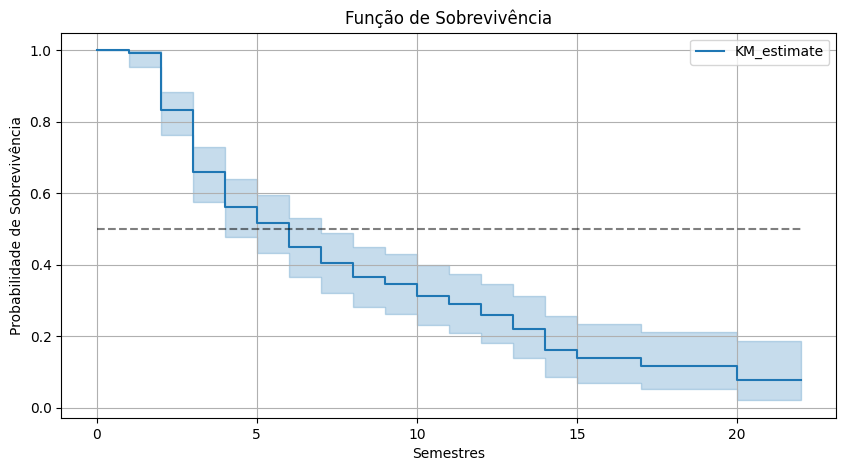

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
kmf.plot_survival_function()
ax.set_title("Função de Sobrevivência")
ax.set_xlabel("Semestres")
ax.set_ylabel("Probabilidade de Sobrevivência")
ax.hlines(0.5, xmin=0, xmax=int(df["tempo"].max()), color="k", linestyles="--", alpha=0.5)
ax.grid(2)

Também pode-se observar o gráfico da Função Taxa de Falha ou Função Risco, que neste caso, é uma função crescente indicando que à medida que o número de semestres aumentam, há um acréscimo na função risco, ou seja, aumenta a taxa de evasão no curso.

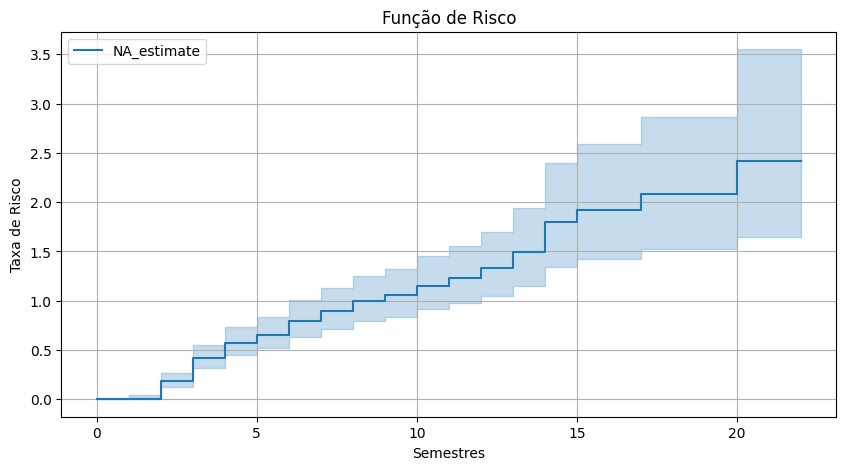

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
naf.plot_cumulative_hazard();
ax.set_title("Função de Risco")
ax.set_xlabel("Semestres")
ax.set_ylabel("Taxa de Risco");
ax.grid(2);

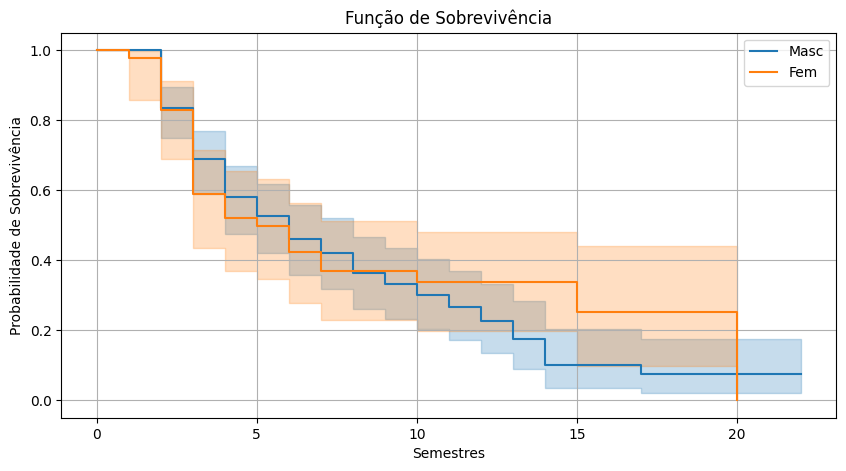

In [60]:
gen1 = df.loc[df["genero"] == 1]
gen2 = df.loc[df["genero"] == 2]

kmf1 = KaplanMeierFitter()
kmf1.fit(gen1["tempo"], event_observed=gen1["censura"]);

kmf2 = KaplanMeierFitter()
kmf2.fit(gen2["tempo"], event_observed=gen2["censura"]);

fig, ax = plt.subplots(figsize=(10, 5))
kmf1.plot_survival_function(ax=ax, label="Masc")
kmf2.plot_survival_function(ax=ax, label="Fem")
ax.set_title("Função de Sobrevivência")
ax.set_xlabel("Semestres")
ax.set_ylabel("Probabilidade de Sobrevivência")
ax.grid(2)

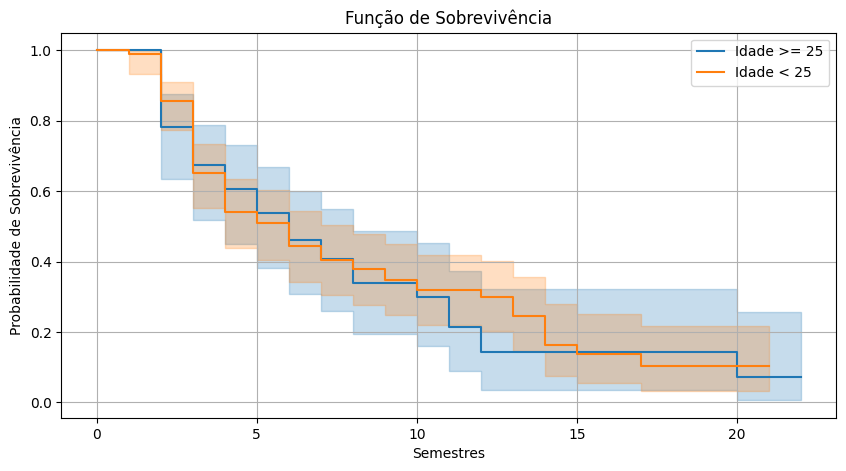

In [68]:
gen1 = df.loc[df["idade"] >= 25]
gen2 = df.loc[df["idade"] < 25]

kmf1 = KaplanMeierFitter()
kmf1.fit(gen1["tempo"], event_observed=gen1["censura"]);

kmf2 = KaplanMeierFitter()
kmf2.fit(gen2["tempo"], event_observed=gen2["censura"]);

fig, ax = plt.subplots(figsize=(10, 5))
kmf1.plot_survival_function(ax=ax, label="Idade >= 25")
kmf2.plot_survival_function(ax=ax, label="Idade < 25")
ax.set_title("Função de Sobrevivência")
ax.set_xlabel("Semestres")
ax.set_ylabel("Probabilidade de Sobrevivência")
ax.grid(2)

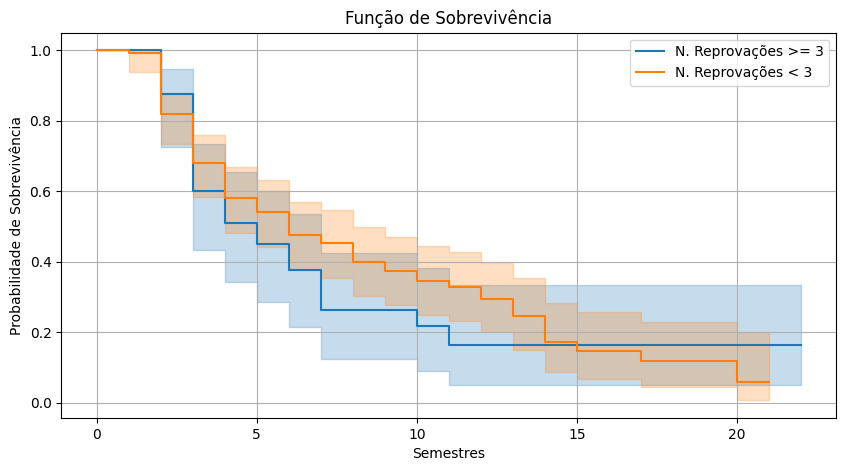

In [71]:
gen1 = df.loc[df["n_reprovacoes"] >= 3]
gen2 = df.loc[df["n_reprovacoes"] < 3]

kmf1 = KaplanMeierFitter()
kmf1.fit(gen1["tempo"], event_observed=gen1["censura"]);

kmf2 = KaplanMeierFitter()
kmf2.fit(gen2["tempo"], event_observed=gen2["censura"]);

fig, ax = plt.subplots(figsize=(10, 5))
kmf1.plot_survival_function(ax=ax, label="N. Reprovações >= 3")
kmf2.plot_survival_function(ax=ax, label="N. Reprovações < 3")
ax.set_title("Função de Sobrevivência")
ax.set_xlabel("Semestres")
ax.set_ylabel("Probabilidade de Sobrevivência")
ax.grid(2)